In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


$\large \text{Read the data set in Data Q2.csv into a pandas dataframe.}$

In [265]:
data=pd.read_csv('Data_Q2.csv')

In [266]:
data

,Temperature,Humidity,Wind Speed,Flow,Consumption
0,5.578,93.00,0.082,0.185,5935.174070
1,15.510,64.38,0.085,0.133,6044.657863
2,15.730,64.21,0.084,0.152,6061.944778
3,15.620,65.22,0.083,0.145,6108.043217
4,15.450,67.69,0.083,0.189,6119.567827
...,...,...,...,...,...
995,17.330,42.24,4.917,31.540,9443.855422
996,7.010,76.40,4.920,65.890,9449.638554
997,14.810,82.30,4.913,0.159,9449.638554
998,12.090,77.40,0.073,0.104,9449.638554


$\large \text{Perform standardization of each column in the data frame and create a new data
frame.}$

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


In [268]:
scalar=StandardScaler()
data_standard=scalar.fit_transform(data)

In [269]:
data_standard=pd.DataFrame(data_standard,columns=data.columns)

In [270]:
data_standard

,Temperature,Humidity,Wind Speed,Flow,Consumption
0,-1.931878,1.404846,-0.641791,-0.664370,-3.450208
1,0.407654,-0.874474,-0.640417,-0.665724,-3.282442
2,0.459476,-0.888013,-0.640875,-0.665229,-3.255953
3,0.433565,-0.807575,-0.641333,-0.665412,-3.185315
4,0.393521,-0.610863,-0.641333,-0.664266,-3.167655
...,...,...,...,...,...
995,0.836365,-2.637721,1.572655,0.152039,1.926266
996,-1.594563,0.082809,1.574029,1.046430,1.935127
997,0.242766,0.552690,1.570823,-0.665047,1.935127
998,-0.397944,0.162450,-0.645913,-0.666479,1.935127


In [271]:
data_standard.describe()

,Temperature,Humidity,Wind Speed,Flow,Consumption
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,1.989520e-16,1.563194e-16,7.460699e-17,0.000000,-1.591616e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-2.171202e+00,-2.908500e+00,-6.504934e-01,-0.668041,-3.450208e+00
25%,-7.400875e-01,-7.560080e-01,-6.427073e-01,-0.665516,-6.790723e-01
50%,1.897660e-01,2.420906e-01,-6.408753e-01,-0.524340,1.096184e-01
75%,7.786535e-01,8.871812e-01,1.570823e+00,0.308264,7.168465e-01
max,2.468761e+00,1.540236e+00,1.609753e+00,6.407833,1.935666e+00


$\text{Q3. Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if } \\ \text{ the splits T1 and T2 have similar spread in
Consumption column.}$

In [272]:
data_X=data_standard[data.columns[:-1]]
data_Y=data_standard[data.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=34)


In [273]:
print('number of training data point :',len(X_train),'number of test data point:',len(X_test))

number of training data point : 800 number of test data point: 200


In [274]:
print('spread of Consumption column in training data :',np.array(Y_train).max()-np.array(Y_train).min())

spread of Consumption column in training data : 5.385873933107962


In [275]:
print('spread of Consumption column in test data :',np.array(Y_test).max()-np.array(Y_test).min())

spread of Consumption column in test data : 5.093920780103174


$\text{Here we can see that spread of the Consumption column  is approximately same for both traing and test data.}$

$ \text{Q5.Using T1 as training data, train kernel ridge regression model. Use RBF kernel and
tune the gamma parameter using 5-fold cross-validation.}$

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold

In [277]:
# Define the range of hyperparameters to be optimized
params = { 'gamma': [0.001,0.01, 0.1, 1,10,100]}

# Define the number of folds for cross-validation
kf = KFold(n_splits=5)

# Perform grid search over the hyperparameters using cross-validation
krr = GridSearchCV(KernelRidge(kernel='rbf'), params, cv=kf )
krr.fit(X_train, Y_train)

# Print the optimal hyperparameters
print('Optimal hyperparameters:', krr.best_params_)

best_gamma=krr.best_params_['gamma']

final_krr=KernelRidge(kernel='rbf',gamma=best_gamma)
final_krr.fit(X_train,Y_train)

y_pred=final_krr.predict(X_test)

print(mean_squared_error(Y_test,y_pred))




Optimal hyperparameters: {'gamma': 10}
0.6342715027347814


$\text{Q6.Compute and display the RMSE and R2 values on the training set T1 and test set
T2.}$

In [278]:
# RMSE and R2 values
print('For T1 data set:\n*******************************************')
y_pred=final_krr.predict(X_train)
print('RMSE Value for T1 data is:',(mean_squared_error(Y_train,y_pred,squared=False)))
print('R2 value for T1 data  is :',r2_score(Y_train,y_pred))
print('For T1 data set:\n*******************************************')
y_pred=final_krr.predict(X_test)
print('RMSE Value for T2 data is:',(mean_squared_error(Y_test,y_pred,squared=False)))
print('R2 value for T2 data  is :',r2_score(Y_test,y_pred))



For T1 data set:
*******************************************
RMSE Value for T1 data is: 0.6565566789438295
R2 value for T1 data  is : 0.57694532427478
For T1 data set:
*******************************************
RMSE Value for T2 data is: 0.7964116415113364
R2 value for T2 data  is : 0.3135314885822177


In [279]:
df2=pd.read_csv('Data_Q2.csv')
df2

,Temperature,Humidity,Wind Speed,Flow,Consumption
0,5.578,93.00,0.082,0.185,5935.174070
1,15.510,64.38,0.085,0.133,6044.657863
2,15.730,64.21,0.084,0.152,6061.944778
3,15.620,65.22,0.083,0.145,6108.043217
4,15.450,67.69,0.083,0.189,6119.567827
...,...,...,...,...,...
995,17.330,42.24,4.917,31.540,9443.855422
996,7.010,76.40,4.920,65.890,9449.638554
997,14.810,82.30,4.913,0.159,9449.638554
998,12.090,77.40,0.073,0.104,9449.638554


In [280]:
def cla(x):
  if x<=6500:
    return 1
  elif x>6500 and x<=7000:
    return 2
  elif x>7000 and x<=7500:
    return 3
  elif x>7500 and x<=8000:
    return 4
  elif x>8000 and x<=8500:
    return 5
  elif x>8500 and x<=9000:
    return 6
  else:
    return 7      


In [281]:
df2['class']=df2['Consumption'].apply(cla)

In [282]:
df2

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
0,5.578,93.00,0.082,0.185,5935.174070,1
1,15.510,64.38,0.085,0.133,6044.657863,1
2,15.730,64.21,0.084,0.152,6061.944778,1
3,15.620,65.22,0.083,0.145,6108.043217,1
4,15.450,67.69,0.083,0.189,6119.567827,1
...,...,...,...,...,...,...
995,17.330,42.24,4.917,31.540,9443.855422,7
996,7.010,76.40,4.920,65.890,9449.638554,7
997,14.810,82.30,4.913,0.159,9449.638554,7
998,12.090,77.40,0.073,0.104,9449.638554,7


$\text{Q7.Perform standardization of samples in frame2 belonging to each class separately.
Ignore Class column during standardization procedure.}$

In [283]:

data_standard=pd.DataFrame()
for i in range(1,8):
  data_label=df2[df2['class']==i]
  data_X=data_label[data_label.columns[:-1]]
  scaler=StandardScaler()
  data_X=scaler.fit_transform(data_X)
  df=pd.DataFrame(data_X,columns=data.columns)
  data_standard=pd.concat([data_standard,df])
data_standard=data_standard.reset_index(drop=True)
data_standard['class']=df2['class']  
  



In [284]:
data_standard

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
0,-1.690575,1.563325,-0.508727,-0.365626,-1.925782,1
1,1.083295,-1.525195,0.581402,-0.412271,-1.304210,1
2,1.144738,-1.543541,0.218026,-0.395227,-1.206067,1
3,1.114017,-1.434547,-0.145350,-0.401507,-0.944353,1
4,1.066538,-1.167998,-0.145350,-0.362038,-0.878924,1
...,...,...,...,...,...,...
995,0.572096,-2.357184,1.585485,-0.112966,1.711956,7
996,-1.984162,0.416500,1.586861,0.552813,1.753338,7
997,-0.052107,0.895561,1.583650,-0.721200,1.753338,7
998,-0.725849,0.497697,-0.636763,-0.722266,1.753338,7


In [285]:
data_standard.describe()

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.989520e-16,-2.700062e-16,2.842171e-17,-7.815970e-17,2.685852e-15,4.894000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.329109
min,-2.425609e+00,-2.712508e+00,-1.235479e+00,-7.647604e-01,-1.925782e+00,1.000000
25%,-7.719997e-01,-7.423306e-01,-6.744326e-01,-7.277721e-01,-8.379542e-01,4.000000
50%,1.856897e-01,2.349829e-01,-5.941244e-01,-3.953413e-01,-3.550668e-02,5.000000
75%,7.960005e-01,8.308760e-01,1.335877e+00,3.144329e-01,7.273129e-01,6.000000
max,2.288653e+00,1.649531e+00,3.125035e+00,5.594999e+00,2.732299e+00,7.000000


$\text{Q8.Split frame2 into train and test splits T3 and T4, such that the samples in T3 are
the same as in T1. Consider T3 as training set, ignore the} \\ \text{ Consumption column and considering
Class as labels, train a kernel SVM model with RBF kernel. Tune gamma parameter using 5
fold } \\ \text{ cross-validation. Take care of class imbalance issues if they exist.}$

In [286]:
data_standard_X=data_standard[data_standard.columns[:-1]]
data_standard_Y=data_standard[data_standard.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_standard_X,data_standard_Y,test_size=0.2,random_state=34)

In [287]:
T3_data=pd.concat([X_train,Y_train],axis=1)
T4_data=pd.concat([X_test,Y_test],axis=1)

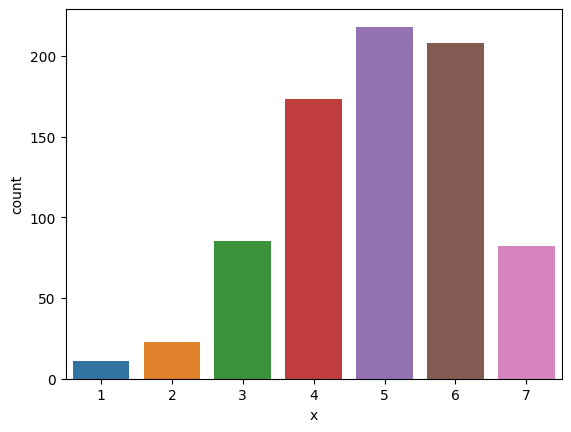

In [288]:
df=pd.DataFrame(np.array(T3_data['class']),columns=['x'])
ax=sns.countplot(x='x',data=df)

$\large \text{As we can see that there is class imbalance in data so now we will try oversampling to overcome with this situation.}$

In [289]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)

In [290]:
# now we update our T3 data by oversampling
T3_data_upd=pd.concat([X_resampled,y_resampled],axis=1).reset_index(drop=True)


In [291]:
T3_data_upd

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
0,1.609693,-1.339866,-0.751966,-0.728621,1.482921,5
1,-2.055083,0.684891,1.336310,0.022144,0.117546,5
2,0.547885,-0.066775,-0.545648,1.167868,1.573014,3
3,0.974481,-0.351433,-0.757587,0.612126,0.005693,5
4,-2.130883,0.715631,1.689565,0.039960,-0.586269,6
...,...,...,...,...,...,...
1521,2.088016,-0.423075,1.585485,-0.722053,-0.970867,7
1522,1.211160,1.407102,-0.640433,-0.721627,0.699530,7
1523,-0.128894,0.051114,-0.632634,-0.052300,0.107873,7
1524,0.745485,-0.343502,-0.632176,-0.425214,-0.970867,7


$\large \text{For training data set after oversampling(T3_data_upd):}$

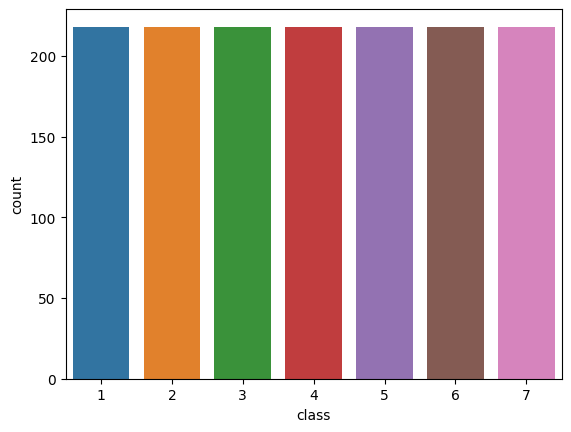

In [292]:
ax=sns.countplot(x='class',data=T3_data_upd)

$\large \text{So we can observe by above plots that our class imbalance problem is solved using oversampling.}$

In [293]:
T3_data_upd

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
0,1.609693,-1.339866,-0.751966,-0.728621,1.482921,5
1,-2.055083,0.684891,1.336310,0.022144,0.117546,5
2,0.547885,-0.066775,-0.545648,1.167868,1.573014,3
3,0.974481,-0.351433,-0.757587,0.612126,0.005693,5
4,-2.130883,0.715631,1.689565,0.039960,-0.586269,6
...,...,...,...,...,...,...
1521,2.088016,-0.423075,1.585485,-0.722053,-0.970867,7
1522,1.211160,1.407102,-0.640433,-0.721627,0.699530,7
1523,-0.128894,0.051114,-0.632634,-0.052300,0.107873,7
1524,0.745485,-0.343502,-0.632176,-0.425214,-0.970867,7


In [294]:
T4_data.head()

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
430,0.904162,1.108841,1.367439,-0.728521,-0.837645,5
972,0.681084,-0.678034,-0.635846,1.444590,0.973777,7
395,-0.999131,-1.196194,-0.753696,-0.188421,-1.344155,5
310,-1.111944,0.806840,-0.672180,-0.727963,0.846403,4
130,-0.033707,-0.508190,-0.539612,3.890950,1.221135,3


In [295]:
X_train=T3_data_upd[T3_data_upd.columns[:-2]].reset_index(drop=True)
Y_train=T3_data_upd[T3_data_upd.columns[-1]].reset_index(drop=True)
X_test=T4_data[T4_data.columns[:-2]].reset_index(drop=True)
Y_test=T4_data[T4_data.columns[-1]].reset_index(drop=True)


In [296]:
X_test

,Temperature,Humidity,Wind Speed,Flow
0,0.904162,1.108841,1.367439,-0.728521
1,0.681084,-0.678034,-0.635846,1.444590
2,-0.999131,-1.196194,-0.753696,-0.188421
3,-1.111944,0.806840,-0.672180,-0.727963
4,-0.033707,-0.508190,-0.539612,3.890950
...,...,...,...,...
195,-0.700175,0.755885,-0.596489,-0.763905
196,-0.036477,-1.377362,-0.674433,0.587627
197,0.416045,-0.689401,-0.636304,2.686991
198,0.133343,0.981309,-0.598853,-0.762887


In [298]:
T3_data=T3_data.reset_index(drop=True)
T3_data.head()

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
0,1.609693,-1.339866,-0.751966,-0.728621,1.482921,5
1,-2.055083,0.684891,1.336310,0.022144,0.117546,5
2,0.547885,-0.066775,-0.545648,1.167868,1.573014,3
3,0.974481,-0.351433,-0.757587,0.612126,0.005693,5
4,-2.130883,0.715631,1.689565,0.039960,-0.586269,6


In [300]:
param_grid = { 'gamma': [0.001, 0.01, 0.1, 1,10,100,1000]}
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
kernal_SVM = SVC(kernel='rbf')
grid_search = GridSearchCV(kernal_SVM, param_grid,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set

best_gamma=grid_search.best_params_['gamma']
print(f"Best_gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernal_SVM = SVC(kernel='rbf',gamma=best_gamma)
final_kernal_SVM.fit(X_train, Y_train)

#for T3 data set
y_pred_T3=final_kernal_SVM.predict(T3_data[T3_data.columns[:-2]])
print(y_pred_T3)


# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred_T4 = final_kernal_SVM.predict(X_test)
print('for T4 ',y_pred_T4)

Best_gamma:100
[5 5 3 5 6 6 7 5 6 4 5 4 4 5 6 5 5 7 6 4 5 5 6 3 4 6 7 6 4 5 4 6 4 6 4 5 6
 6 5 4 5 4 7 6 7 5 4 6 5 4 6 6 5 6 7 5 6 5 7 7 7 2 6 4 4 3 6 5 6 6 4 7 3 5
 4 7 6 4 3 1 6 2 4 6 5 6 6 4 5 4 3 5 6 7 2 5 5 3 6 5 6 6 3 6 6 3 5 4 3 6 7
 5 2 5 6 6 6 6 6 4 4 3 6 6 6 6 5 2 6 4 5 4 3 5 4 6 4 4 7 3 4 6 3 4 6 6 4 5
 5 4 6 4 4 5 6 5 6 6 5 6 3 4 6 6 6 6 4 4 5 3 7 5 3 6 7 5 5 7 5 7 4 4 4 6 5
 6 6 6 6 4 7 6 7 4 5 3 7 5 6 6 5 5 6 7 6 3 3 4 6 4 7 5 5 6 4 5 4 2 3 6 7 5
 4 3 6 6 4 3 4 7 3 6 5 3 7 5 6 7 6 7 4 6 6 4 5 5 6 5 5 5 5 5 5 6 5 4 6 6 4
 6 5 3 4 4 4 3 6 5 7 4 4 7 4 6 3 4 5 4 7 3 3 5 1 7 6 3 4 4 6 2 4 4 5 4 5 5
 5 3 7 6 4 4 7 4 3 2 4 5 5 5 6 2 6 6 6 3 5 4 7 7 4 7 6 5 6 1 6 6 5 5 5 5 5
 7 5 5 6 6 3 3 4 5 4 5 5 5 1 5 6 3 4 6 6 5 5 2 3 4 7 4 7 2 3 4 7 4 4 5 3 7
 6 6 5 5 6 4 6 1 5 4 7 7 3 5 5 6 7 5 5 5 4 5 5 5 5 5 5 7 3 5 7 3 5 6 6 3 7
 6 5 4 3 5 5 6 6 6 4 4 5 3 3 6 2 4 6 6 4 5 2 2 4 7 5 6 4 3 6 5 1 6 6 6 6 5
 4 5 4 5 6 6 3 4 2 6 7 7 6 6 6 5 5 7 3 6 7 6 5 5 5 4 4 6 6 7 5 5 4 4 2 5 4
 3 5 6 6 6

$\large \text{Qj.} \\ \text{Now consider samples belonging to a particular class i in T3: build a kernel ridge
regression model with RBF kernel (ignore the Class column} \\ \text{ for this task). Tune gamma parameter
using 5 fold cross-validation restricted to samples belonging to only class i. Repeat this
for each class.} \\ \text{ Thus, at the end, for each class i, you would now have a kernel ridge regression
model Mi.}$

In [302]:
ridge_reg_models={}
for i in range(1,8):
  # for state i
  data_sample=T3_data[T3_data['class']==i]
  data_sample_X=data_sample[data_sample.columns[:-2]]
  data_sample_Y=data_sample[data_sample.columns[-2]]

  # fitting into ridge regression 
  # Define the range of hyperparameters to be optimized
  params = { 'gamma': [0.001,0.01, 0.1, 1,10,100]}

  # Define the number of folds for cross-validation
  kf = KFold(n_splits=5)

  # Perform grid search over the hyperparameters using cross-validation
  krr = GridSearchCV(KernelRidge(kernel='rbf'), params, cv=kf )
  krr.fit(data_sample_X, data_sample_Y)

  # Print the optimal hyperparameters
  print('Optimal hyperparameters:', krr.best_params_)

  best_gamma=krr.best_params_['gamma']

  final_krr=KernelRidge(kernel='rbf',gamma=best_gamma)
  final_krr.fit(data_sample_X, data_sample_Y)
  ridge_reg_models[f'M{i}']=final_krr
  
  



Optimal hyperparameters: {'gamma': 1}
Optimal hyperparameters: {'gamma': 1}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 100}
Optimal hyperparameters: {'gamma': 100}
Optimal hyperparameters: {'gamma': 10}


In [303]:
ridge_reg_models

{'M1': KernelRidge(gamma=1, kernel='rbf'),
 'M2': KernelRidge(gamma=1, kernel='rbf'),
 'M3': KernelRidge(gamma=10, kernel='rbf'),
 'M4': KernelRidge(gamma=10, kernel='rbf'),
 'M5': KernelRidge(gamma=100, kernel='rbf'),
 'M6': KernelRidge(gamma=100, kernel='rbf'),
 'M7': KernelRidge(gamma=10, kernel='rbf')}

$\huge \text{Qk.} \\ \text{For testing (or) inference, implement the following procedure: for any sample, first
predict the class label as j and then based on the class label} \\ \text{ j, use model Mj to predict the
Consumption value. Using this procedure, find the RMSE values for T3 and T4.}$

In [304]:
T4_data.head()

,Temperature,Humidity,Wind Speed,Flow,Consumption,class
430,0.904162,1.108841,1.367439,-0.728521,-0.837645,5
972,0.681084,-0.678034,-0.635846,1.444590,0.973777,7
395,-0.999131,-1.196194,-0.753696,-0.188421,-1.344155,5
310,-1.111944,0.806840,-0.672180,-0.727963,0.846403,4
130,-0.033707,-0.508190,-0.539612,3.890950,1.221135,3


In [305]:
X_test.head()

,Temperature,Humidity,Wind Speed,Flow
0,0.904162,1.108841,1.367439,-0.728521
1,0.681084,-0.678034,-0.635846,1.444590
2,-0.999131,-1.196194,-0.753696,-0.188421
3,-1.111944,0.806840,-0.672180,-0.727963
4,-0.033707,-0.508190,-0.539612,3.890950


In [306]:
# T4 data is our test data 
consumption_pred_T4=[]
for i in range(len(y_pred_T4)):
  pred=ridge_reg_models[f'M{y_pred_T4[i]}'].predict(X_test)
  consumption_pred_T4.append(pred[i])


In [307]:
# T3  data 
consumption_pred_T3=[]
for i in range(len(y_pred_T3)):
  pred=ridge_reg_models[f'M{y_pred_T3[i]}'].predict(T3_data[T3_data.columns[:-2]])
  consumption_pred_T3.append(pred[i])


In [311]:
print('RMSE Value for T4 data :',mean_squared_error(T4_data['Consumption'],consumption_pred_T4,squared=False))
print('RMSE value for T3 data:',mean_squared_error(T3_data['Consumption'],consumption_pred_T3,squared=False))

RMSE Value for T4 data : 0.9931211358527461
RMSE value for T3 data: 0.5553964444278007


$\huge \text{Q L. } \\ \text{Compare and contrast the RMSE values obtained in part (f) and part (k). Using
your observations, suggest when the two-stage approach of} \\ \text{ classification-followed-by-regression
would be useful when compared to the simple regression approach on the full data set.}$

In [315]:
print('Simple Regression approach:\n**************************************************')
print('RMSE value for T1 data:',0.6565566789438295)
print('RMSE value for T2 data:',0.7964116415113364)
print('***********************************************\n Two stage approach :\n****************************************************************')
print('RMSE value for T3 data:',0.5553964444278007)
print('RMSE value for T4 data:',0.9931211358527461)

Simple Regression approach:
**************************************************
RMSE value for T1 data: 0.6565566789438295
RMSE value for T2 data: 0.7964116415113364
***********************************************
 Two stage approach :
****************************************************************
RMSE value for T3 data: 0.5553964444278007
RMSE value for T4 data: 0.9931211358527461


$\large \text{Observation:} \\ \text{As we can see that while using Simple Regression approach we get lower RMSE value for unseen data which indicates that simple regression} \\ \text{ approach is better than two-stage approach of classification-followed-by-regression }$